## Predictive Analysis and Insights from Real-World Data

# Predicting Diabetes Diagnosis from Research Data
Objective: Determine whether a person may be diagnosed with Diabetes based on a set of health and risk behaviours.

## Data Acquisition
The dataset being used for this project is the results from the 2015 Behaviorial Risk Factor Surveillance System (BRFSS).

View the dataset on Kaggle using this link:

https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system?select=2015.csv

### Objective
The objective of this project is to create a model that is able to determine the likelihood of being diagnosed with Diabetes based on risk behaviours.

## Import Libraries and Dataset

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [2]:
pd.options.mode.copy_on_write = True

In [4]:
# Mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# Import dataset into a csv file
df = pd.read_csv('/content/drive/MyDrive/COMP3162 Group Project/2015.csv')

df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


## Data Preprocessing

### Columns to be Used

SEX: The gender of the respondent

_RFHLTH: Adults with good or better health

_HCVU651: Adults aged 18-64 who have any form of healthcare coverage

_RFHYPE5: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional

_RFCHOL: Adults who have had their cholesterol checked and have been told by a doctor, nurse, or other health professional
that it was high

_MICHD: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

_ASTHMS1: Computed asthma status

_DRDXAR1: Respondents who have had a doctor diagnose them as having some form of arthritis

_AGEG5YR: Fourteen-level age category

_BMI5CAT:  Four-categories of Body Mass Index (BMI)

_INCOMG: Income categories

_SMOKER3: Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker

_DRNKWEK: Calculated total number of alcoholic beverages consumed per week

_FRUTSUM: Total fruits consumed per day

_VEGESUM: Total vegetables consumed per day

_PACAT1: Physical Activity Categories

_PAREC1: Aerobic and Strengthening Guideline

DIABETE3: Diagnosed with diabetes


Additional details on how these values are computed from the surveys can be found on the CDC'c website: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

See accompanying documentation for label encoding of each variables used to create the model.

In [27]:
# Drop columns not being used
df = df[['SEX','_RFHLTH','_HCVU651','_RFHYPE5','_RFCHOL','_MICHD','_ASTHMS1','_DRDXAR1','_AGEG5YR','_BMI5CAT','_INCOMG','_SMOKER3','_DRNKWEK','_FRUTSUM','_VEGESUM','_PACAT1','_PAREC1','DIABETE3']]
df

,SEX,_RFHLTH,_HCVU651,_RFHYPE5,_RFCHOL,_MICHD,_ASTHMS1,_DRDXAR1,_AGEG5YR,_BMI5CAT,_INCOMG,_SMOKER3,_DRNKWEK,_FRUTSUM,_VEGESUM,_PACAT1,_PAREC1,DIABETE3
0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,9.0,4.0,2.0,3.0,5.397605e-79,50.0,217.0,4.0,4.0,3.0
1,2.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,7.0,3.0,1.0,1.0,5.397605e-79,24.0,78.0,2.0,2.0,3.0
2,2.0,2.0,9.0,1.0,2.0,NaN,3.0,1.0,11.0,2.0,9.0,9.0,9.990000e+04,NaN,NaN,9.0,9.0,3.0
3,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,9.0,3.0,5.0,4.0,5.397605e-79,100.0,20.0,4.0,4.0,3.0
4,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,9.0,2.0,9.0,4.0,5.397605e-79,NaN,200.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,2.0,2.0,9.0,2.0,2.0,2.0,3.0,1.0,11.0,1.0,2.0,4.0,5.397605e-79,29.0,99.0,4.0,4.0,1.0
441452,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,4.0,5.397605e-79,117.0,82.0,2.0,2.0,3.0
441453,2.0,2.0,9.0,2.0,2.0,2.0,3.0,2.0,11.0,4.0,3.0,3.0,9.300000e+01,NaN,NaN,9.0,9.0,3.0
441454,1.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,7.0,2.0,1.0,4.0,5.397605e-79,200.0,135.0,4.0,4.0,3.0


### Handling Null Values

In [28]:
# Check for null values
df.isna().sum()

SEX             0
_RFHLTH         0
_HCVU651        0
_RFHYPE5        0
_RFCHOL     59154
_MICHD       3942
_ASTHMS1        0
_DRDXAR1     2799
_AGEG5YR        0
_BMI5CAT    36398
_INCOMG         0
_SMOKER3        0
_DRNKWEK        0
_FRUTSUM    43711
_VEGESUM    51117
_PACAT1         0
_PAREC1         0
DIABETE3        7
dtype: int64

In [29]:
df.fillna({'_BMI5CAT': float(df['_BMI5CAT'].mode()),'_FRUTSUM': round(df['_FRUTSUM'].mean()),'_VEGESUM': round(df['_VEGESUM'].mean())}, inplace=True)
df

<ipython-input-29-5996580d9cef>:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df.fillna({'_BMI5CAT': float(df['_BMI5CAT'].mode()),'_FRUTSUM': round(df['_FRUTSUM'].mean()),'_VEGESUM': round(df['_VEGESUM'].mean())}, inplace=True)


,SEX,_RFHLTH,_HCVU651,_RFHYPE5,_RFCHOL,_MICHD,_ASTHMS1,_DRDXAR1,_AGEG5YR,_BMI5CAT,_INCOMG,_SMOKER3,_DRNKWEK,_FRUTSUM,_VEGESUM,_PACAT1,_PAREC1,DIABETE3
0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,9.0,4.0,2.0,3.0,5.397605e-79,50.0,217.0,4.0,4.0,3.0
1,2.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,7.0,3.0,1.0,1.0,5.397605e-79,24.0,78.0,2.0,2.0,3.0
2,2.0,2.0,9.0,1.0,2.0,NaN,3.0,1.0,11.0,2.0,9.0,9.0,9.990000e+04,136.0,195.0,9.0,9.0,3.0
3,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,9.0,3.0,5.0,4.0,5.397605e-79,100.0,20.0,4.0,4.0,3.0
4,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,9.0,2.0,9.0,4.0,5.397605e-79,136.0,200.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,2.0,2.0,9.0,2.0,2.0,2.0,3.0,1.0,11.0,1.0,2.0,4.0,5.397605e-79,29.0,99.0,4.0,4.0,1.0
441452,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,4.0,5.397605e-79,117.0,82.0,2.0,2.0,3.0
441453,2.0,2.0,9.0,2.0,2.0,2.0,3.0,2.0,11.0,4.0,3.0,3.0,9.300000e+01,136.0,195.0,9.0,9.0,3.0
441454,1.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,7.0,2.0,1.0,4.0,5.397605e-79,200.0,135.0,4.0,4.0,3.0


In [30]:
# Check again for null values
df.isna().sum()

SEX             0
_RFHLTH         0
_HCVU651        0
_RFHYPE5        0
_RFCHOL     59154
_MICHD       3942
_ASTHMS1        0
_DRDXAR1     2799
_AGEG5YR        0
_BMI5CAT        0
_INCOMG         0
_SMOKER3        0
_DRNKWEK        0
_FRUTSUM        0
_VEGESUM        0
_PACAT1         0
_PAREC1         0
DIABETE3        7
dtype: int64

In [31]:
df = df.dropna()
df

,SEX,_RFHLTH,_HCVU651,_RFHYPE5,_RFCHOL,_MICHD,_ASTHMS1,_DRDXAR1,_AGEG5YR,_BMI5CAT,_INCOMG,_SMOKER3,_DRNKWEK,_FRUTSUM,_VEGESUM,_PACAT1,_PAREC1,DIABETE3
0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,9.0,4.0,2.0,3.0,5.397605e-79,50.0,217.0,4.0,4.0,3.0
1,2.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,7.0,3.0,1.0,1.0,5.397605e-79,24.0,78.0,2.0,2.0,3.0
3,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,9.0,3.0,5.0,4.0,5.397605e-79,100.0,20.0,4.0,4.0,3.0
4,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,9.0,2.0,9.0,4.0,5.397605e-79,136.0,200.0,4.0,4.0,3.0
5,2.0,1.0,9.0,2.0,1.0,2.0,3.0,1.0,11.0,3.0,4.0,4.0,5.397605e-79,200.0,600.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,2.0,2.0,9.0,2.0,2.0,2.0,3.0,1.0,11.0,1.0,2.0,4.0,5.397605e-79,29.0,99.0,4.0,4.0,1.0
441452,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,4.0,5.397605e-79,117.0,82.0,2.0,2.0,3.0
441453,2.0,2.0,9.0,2.0,2.0,2.0,3.0,2.0,11.0,4.0,3.0,3.0,9.300000e+01,136.0,195.0,9.0,9.0,3.0
441454,1.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,7.0,2.0,1.0,4.0,5.397605e-79,200.0,135.0,4.0,4.0,3.0


In [32]:
# Remove columns with no diagnosis

df = df.loc[df['DIABETE3'] < 7]
df

,SEX,_RFHLTH,_HCVU651,_RFHYPE5,_RFCHOL,_MICHD,_ASTHMS1,_DRDXAR1,_AGEG5YR,_BMI5CAT,_INCOMG,_SMOKER3,_DRNKWEK,_FRUTSUM,_VEGESUM,_PACAT1,_PAREC1,DIABETE3
0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,9.0,4.0,2.0,3.0,5.397605e-79,50.0,217.0,4.0,4.0,3.0
1,2.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,7.0,3.0,1.0,1.0,5.397605e-79,24.0,78.0,2.0,2.0,3.0
3,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,9.0,3.0,5.0,4.0,5.397605e-79,100.0,20.0,4.0,4.0,3.0
4,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,9.0,2.0,9.0,4.0,5.397605e-79,136.0,200.0,4.0,4.0,3.0
5,2.0,1.0,9.0,2.0,1.0,2.0,3.0,1.0,11.0,3.0,4.0,4.0,5.397605e-79,200.0,600.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,2.0,2.0,9.0,2.0,2.0,2.0,3.0,1.0,11.0,1.0,2.0,4.0,5.397605e-79,29.0,99.0,4.0,4.0,1.0
441452,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,4.0,5.397605e-79,117.0,82.0,2.0,2.0,3.0
441453,2.0,2.0,9.0,2.0,2.0,2.0,3.0,2.0,11.0,4.0,3.0,3.0,9.300000e+01,136.0,195.0,9.0,9.0,3.0
441454,1.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,7.0,2.0,1.0,4.0,5.397605e-79,200.0,135.0,4.0,4.0,3.0


In [33]:
# Convert column diabetes so that 1 represents is diabetic and 0 not diabetic
df['DIABETE3'] = df['DIABETE3'].apply(lambda x: 1 if x == 2 or x == 1 else 0)
df['DIABETE3']

0         0
1         0
3         0
4         0
5         0
         ..
441451    1
441452    0
441453    0
441454    0
441455    1
Name: DIABETE3, Length: 376375, dtype: int64

## Exploratory Data Analysis

In [34]:
# Description of Dataset
df.describe()

,SEX,_RFHLTH,_HCVU651,_RFHYPE5,_RFCHOL,_MICHD,_ASTHMS1,_DRDXAR1,_AGEG5YR,_BMI5CAT,_INCOMG,_SMOKER3,_DRNKWEK,_FRUTSUM,_VEGESUM,_PACAT1,_PAREC1,DIABETE3
count,376375.000000,376375.000000,376375.000000,376375.000000,376375.000000,376375.000000,376375.000000,376375.000000,376375.000000,376375.000000,376375.000000,376375.000000,3.763750e+05,3.763750e+05,3.763750e+05,376375.000000,376375.000000,376375.000000
mean,1.587611,1.208170,4.183811,1.456202,1.485649,1.902108,2.816353,1.633602,8.273057,2.969132,4.701343,3.554638,5.675971e+03,1.382593e+02,1.976116e+02,3.195318,3.437338,0.151665
std,0.492265,0.553339,3.873609,0.616005,0.855406,0.297169,0.776159,0.481821,3.201100,0.787461,2.350083,1.419747,2.261944e+04,1.283660e+02,1.481808e+02,2.443099,2.369480,0.358697
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,5.397605e-79,5.397605e-79,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,6.000000,2.000000,3.000000,3.000000,5.397605e-79,6.700000e+01,1.200000e+02,1.000000,2.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,9.000000,3.000000,5.000000,4.000000,2.300000e+01,1.140000e+02,1.860000e+02,3.000000,3.000000,0.000000
75%,2.000000,1.000000,9.000000,2.000000,2.000000,2.000000,3.000000,2.000000,11.000000,4.000000,5.000000,4.000000,3.270000e+02,2.000000e+02,2.340000e+02,4.000000,4.000000,0.000000
max,2.000000,9.000000,9.000000,9.000000,9.000000,2.000000,9.000000,2.000000,14.000000,4.000000,9.000000,9.000000,9.990000e+04,1.500000e+04,1.992900e+04,9.000000,9.000000,1.000000


In [35]:
# Correlation Matrix
matrix = df.corr()

matrix

,SEX,_RFHLTH,_HCVU651,_RFHYPE5,_RFCHOL,_MICHD,_ASTHMS1,_DRDXAR1,_AGEG5YR,_BMI5CAT,_INCOMG,_SMOKER3,_DRNKWEK,_FRUTSUM,_VEGESUM,_PACAT1,_PAREC1,DIABETE3
SEX,1.000000,0.010814,0.042864,-0.029015,-0.015484,0.083438,-0.054528,-0.095819,0.055795,-0.098200,0.005619,0.043350,-0.021014,0.072174,0.084420,0.022134,0.023976,-0.007683
_RFHLTH,0.010814,1.000000,0.070788,0.140381,0.084892,-0.180794,-0.061229,-0.187171,0.101857,0.077114,-0.090123,-0.057542,0.005801,-0.034335,-0.052440,0.089436,0.087076,0.178735
_HCVU651,0.042864,0.070788,1.000000,0.230732,0.129519,-0.187436,0.030373,-0.249401,0.775415,-0.053390,0.032605,0.024560,0.004928,0.016806,-0.029008,0.039234,0.046560,0.125884
_RFHYPE5,-0.029015,0.140381,0.230732,1.000000,0.198814,-0.171539,-0.018568,-0.194213,0.286853,0.166089,-0.035241,-0.022843,0.004781,-0.031843,-0.054273,0.047803,0.053484,0.203487
_RFCHOL,-0.015484,0.084892,0.129519,0.198814,1.000000,-0.111031,-0.004310,-0.114538,0.173203,0.068921,-0.002038,-0.022020,0.002637,-0.027598,-0.036673,0.023639,0.028309,0.112222
_MICHD,0.083438,-0.180794,-0.187436,-0.171539,-0.111031,1.000000,0.034094,0.157533,-0.209653,-0.054866,0.060351,0.055670,0.007142,0.021045,0.038374,-0.025510,-0.026427,-0.166207
_ASTHMS1,-0.054528,-0.061229,0.030373,-0.018568,-0.004310,0.034094,1.000000,0.070397,0.033732,-0.049794,0.044600,0.019184,0.009855,-0.002440,-0.001407,-0.006113,-0.003694,-0.042992
_DRDXAR1,-0.095819,-0.187171,-0.249401,-0.194213,-0.114538,0.157533,0.070397,1.000000,-0.320547,-0.119010,0.064859,0.069153,0.026112,0.010582,0.031032,-0.021917,-0.021990,-0.140542
_AGEG5YR,0.055795,0.101857,0.775415,0.286853,0.173203,-0.209653,0.033732,-0.320547,1.000000,-0.025872,0.043201,0.011579,-0.000197,0.015461,-0.029110,0.044365,0.055349,0.155403
_BMI5CAT,-0.098200,0.077114,-0.053390,0.166089,0.068921,-0.054866,-0.049794,-0.119010,-0.025872,1.000000,-0.068844,0.001269,-0.013713,-0.067685,-0.070233,0.046438,0.052886,0.194958


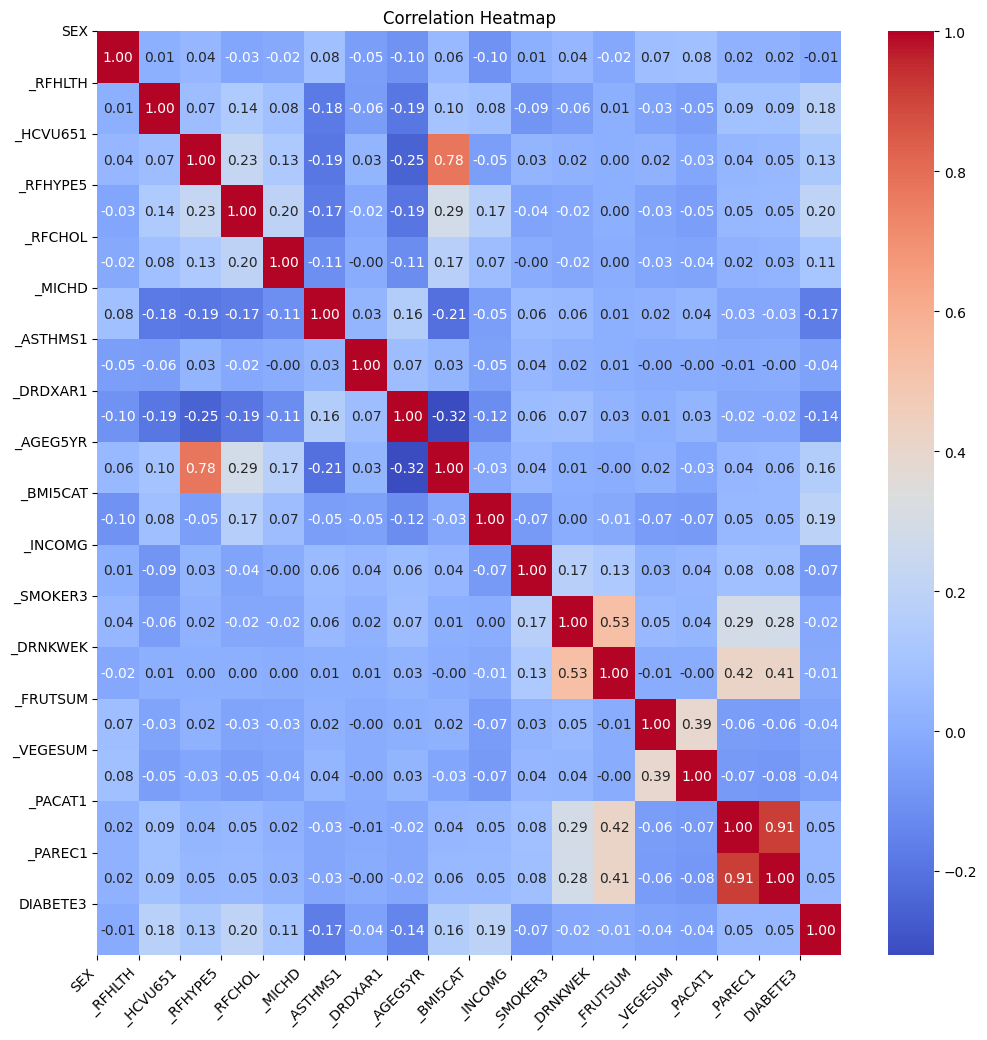

In [36]:
# Correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.xticks(range(18),list(matrix.columns),rotation=45,ha='right')
plt.yticks(range(18),list(matrix.columns))

plt.title("Correlation Heatmap")
plt.show()

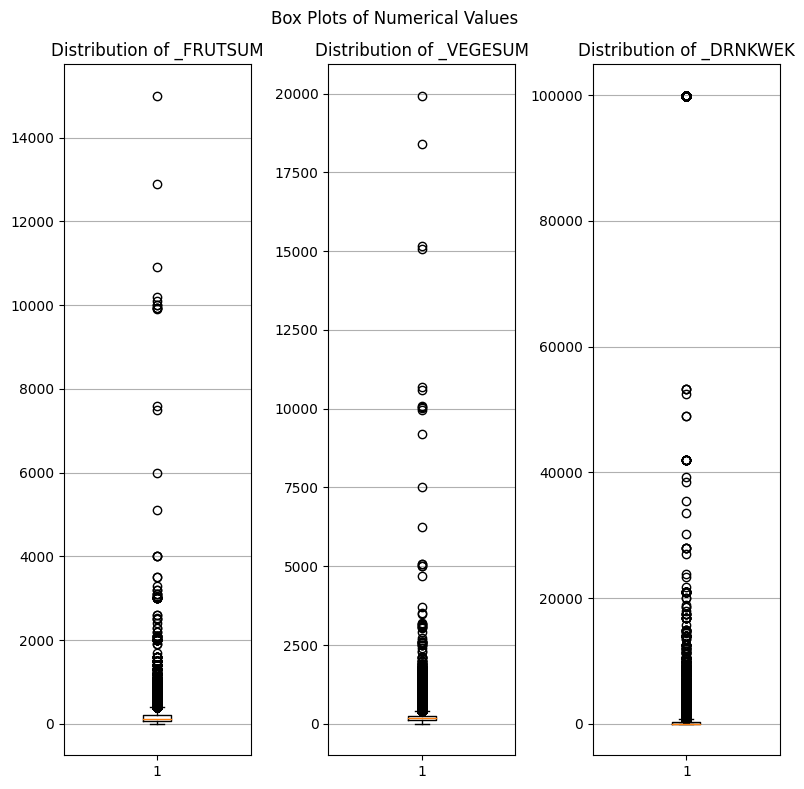

In [37]:
# Box Plot for '_FRUTSUM','_VEGESUM', _DRNKWEK,
fig, ax = plt.subplots(nrows=1,ncols=3)
ax[0].boxplot(df['_FRUTSUM'])
ax[0].set_title('Distribution of _FRUTSUM')
ax[0].grid(axis='y')

ax[1].boxplot(df['_VEGESUM'])
ax[1].set_title("Distribution of _VEGESUM")
ax[1].grid(axis='y')

ax[2].boxplot(df['_DRNKWEK'])
ax[2].set_title("Distribution of _DRNKWEK")
ax[2].grid(axis='y')

fig.suptitle('Box Plots of Numerical Values')
fig.set_size_inches(8,8)
fig.tight_layout()
plt.show()

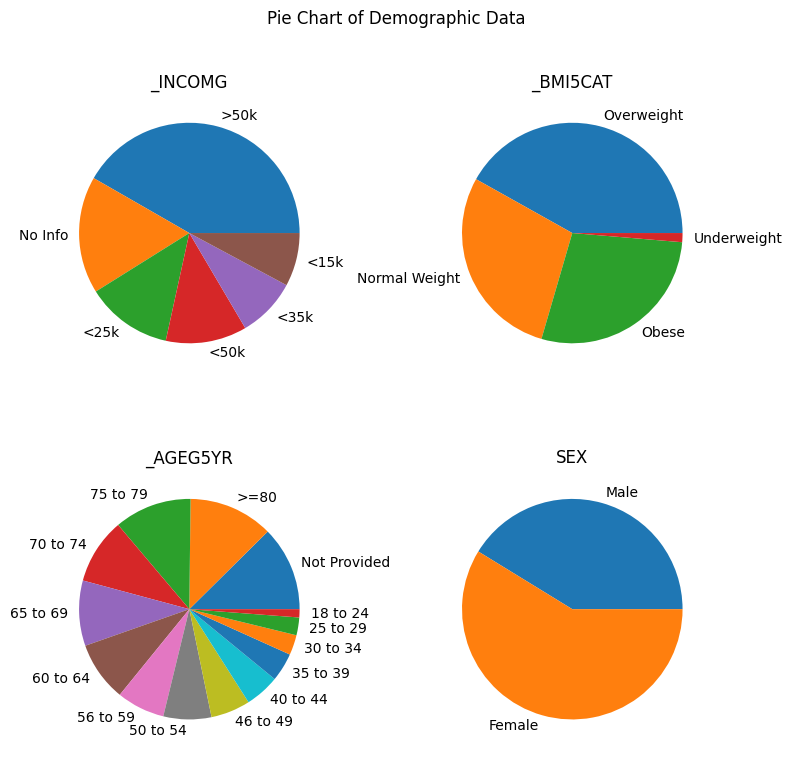

In [38]:
# Pie Charts for '_BMI5CAT' '_AGEG5YR' '_INCOMG'
fig, ax2 = plt.subplots(nrows=2,ncols=2)
ax2[0,0].pie(df['_INCOMG'].value_counts(),labels=['>50k','No Info','<25k','<50k','<35k','<15k'])
ax2[0,0].set_title('_INCOMG')

ax2[0,1].pie(df['_BMI5CAT'].value_counts(),labels=['Overweight','Normal Weight','Obese','Underweight'])
ax2[0,1].set_title("_BMI5CAT")

ax2[1,0].pie(df['_AGEG5YR'].value_counts(),labels=['Not Provided','>=80','75 to 79','70 to 74','65 to 69','60 to 64','56 to 59','50 to 54','46 to 49','40 to 44','35 to 39','30 to 34','25 to 29','18 to 24'])
ax2[1,0].set_title("_AGEG5YR")

ax2[1,1].pie(df['SEX'].value_counts().sort_index(),labels=['Male','Female'])
ax2[1,1].set_title("SEX")

fig.suptitle('Pie Chart of Demographic Data')
fig.set_size_inches(8,8)
fig.tight_layout()

plt.show()

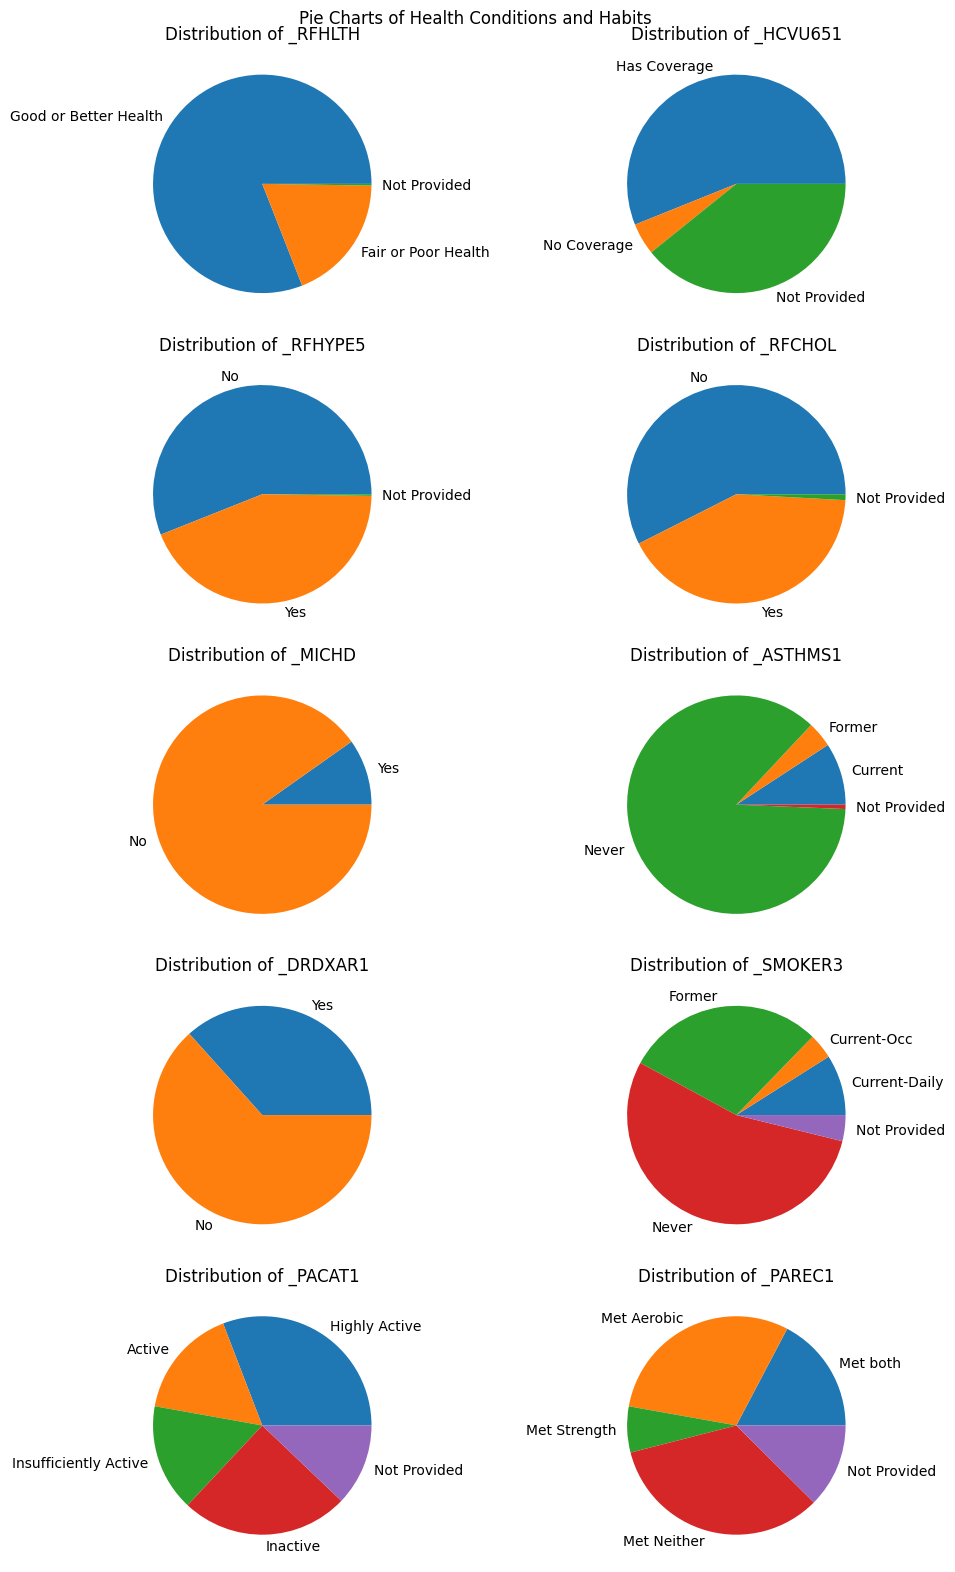

In [39]:
# Bar graphs or histographs for  '_RFHLTH' 'STRFREQ_','_PACAT1' _PASTRNG _PAREC1 _LMTACT1 _SMOKER3
# '_RFHLTH','_HCVU651','_RFHYPE5','_RFCHOL','_MICHD','_ASTHMS1','_DRDXAR1','_SMOKER3','_PACAT1','_PAREC1',
fig, ax3 = plt.subplots(nrows=5,ncols=2)
ax3[0,0].pie(df['_RFHLTH'].value_counts().sort_index(),labels=['Good or Better Health', 'Fair or Poor Health','Not Provided'])
ax3[0,0].set_title('Distribution of _RFHLTH')

ax3[0,1].pie(df['_HCVU651'].value_counts().sort_index(),labels=['Has Coverage','No Coverage','Not Provided'])
ax3[0,1].set_title("Distribution of _HCVU651")

ax3[1,0].pie(df['_RFHYPE5'].value_counts().sort_index(),labels=['No','Yes','Not Provided'])
ax3[1,0].set_title("Distribution of _RFHYPE5")

ax3[1,1].pie(df['_RFCHOL'].value_counts().sort_index(),labels=['No','Yes','Not Provided'])
ax3[1,1].set_title("Distribution of _RFCHOL")

ax3[2,0].pie(df['_MICHD'].value_counts().sort_index(),labels=['Yes','No'])
ax3[2,0].set_title("Distribution of _MICHD")

ax3[2,1].pie(df['_ASTHMS1'].value_counts().sort_index(),labels=['Current','Former','Never','Not Provided'])
ax3[2,1].set_title("Distribution of _ASTHMS1")

ax3[3,0].pie(df['_DRDXAR1'].value_counts().sort_index(),labels=['Yes','No'])
ax3[3,0].set_title("Distribution of _DRDXAR1")

ax3[3,1].pie(df['_SMOKER3'].value_counts().sort_index(),labels=['Current-Daily','Current-Occ','Former','Never','Not Provided'])
ax3[3,1].set_title("Distribution of _SMOKER3")

ax3[4,0].pie(df['_PACAT1'].value_counts().sort_index(),labels=['Highly Active','Active','Insufficiently Active','Inactive','Not Provided'])
ax3[4,0].set_title("Distribution of _PACAT1")

ax3[4,1].pie(df['_PAREC1'].value_counts().sort_index(),labels=['Met both','Met Aerobic','Met Strength','Met Neither','Not Provided'])
ax3[4,1].set_title("Distribution of _PAREC1")

fig.suptitle('Pie Charts of Health Conditions and Habits')
fig.set_size_inches(10,16)
fig.tight_layout()
plt.show()

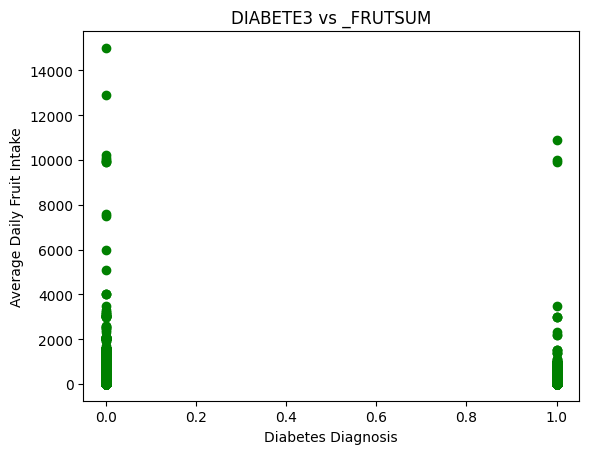

In [40]:
# Scatter plot of age against diabetics
plt.scatter(df['DIABETE3'], df['_FRUTSUM'],color='green')
plt.title("DIABETE3 vs _FRUTSUM")
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("Average Daily Fruit Intake")
plt.show()

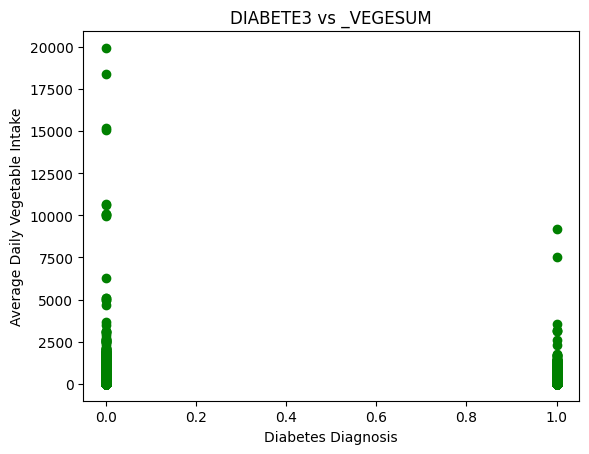

In [41]:
# Scatter plot of age against diabetics
plt.scatter(df['DIABETE3'], df['_VEGESUM'],color='green')
plt.title("DIABETE3 vs _VEGESUM")
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("Average Daily Vegetable Intake")
plt.show()

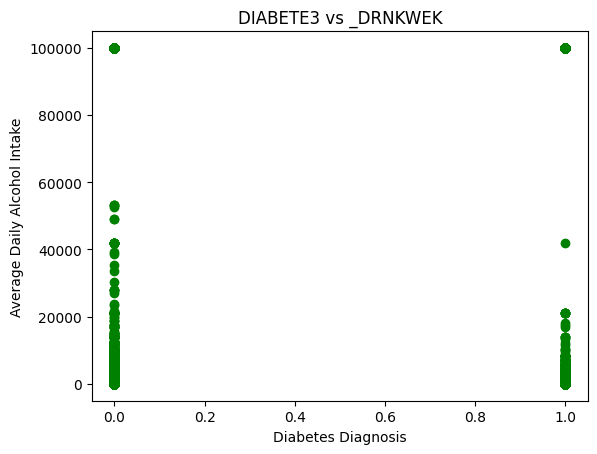

In [42]:
# Scatter plot of age against diabetics
plt.scatter(df['DIABETE3'], df['_DRNKWEK'],color='green')
plt.title("DIABETE3 vs _DRNKWEK")
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("Average Daily Alcohol Intake")
plt.show()

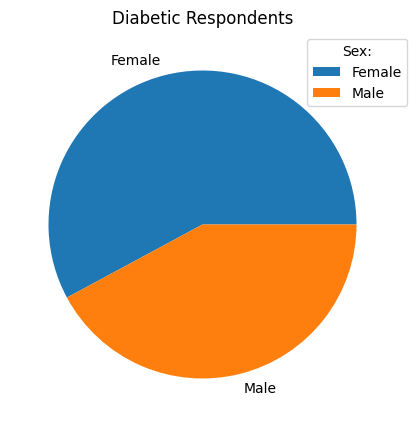

In [43]:
data = df.loc[df['DIABETE3'] == 1]
fig = plt.figure(figsize=(8,5))
plt.pie(data['SEX'].value_counts(),labels=['Female','Male'])
plt.title("Diabetic Respondents")

plt.legend(bbox_to_anchor=(1.05, 1),title = 'Sex:')
plt.show()

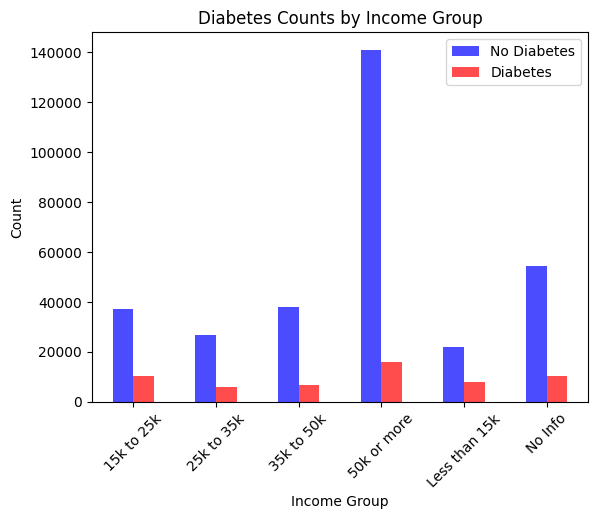

In [44]:
# Mapping categories to readable text
income_map_pie = {
    1.0: 'Less than 15k',
    2.0: '15k to 25k',
    3.0: '25k to 35k',
    4.0: '35k to 50k',
    5.0: '50k or more',
    9.0: 'No Info'
}

# Apply map to dataframe
df_pie = df.copy()
df_pie['_INCOMG'] = df_pie['_INCOMG'].map(income_map_pie)

# Cross-tabulate the data to get counts of diabetes and non-diabetes for each income group
cross_tab = pd.crosstab(df_pie['_INCOMG'], df_pie['DIABETE3'])

# Plot the bar Graph
cross_tab.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Diabetes Counts by Income Group')
plt.xticks(rotation=45)
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

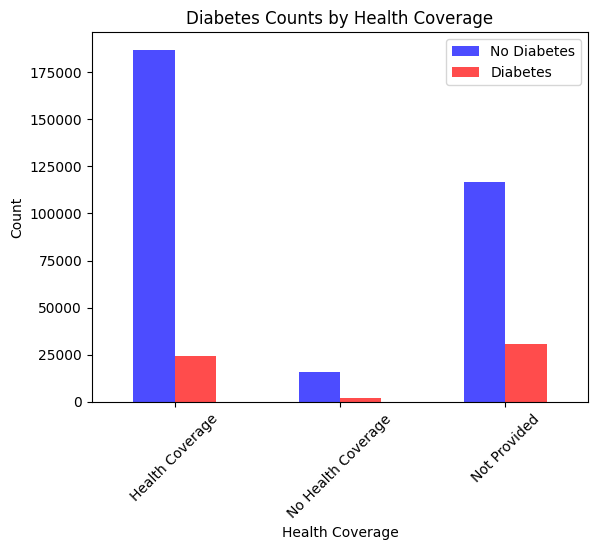

In [45]:
# Mapping categories to readable text
health_map = {
    1: 'Health Coverage',
    2: 'No Health Coverage',
    9: 'Not Provided'
}

# Apply map to dataframe
df_pie['_HCVU651'] = df_pie['_HCVU651'].map(health_map)

# Cross-tabulate the data to get counts of diabetes and non-diabetes for each income group
cross_tab = pd.crosstab(df_pie['_HCVU651'], df_pie['DIABETE3'])

# Plot the graph
cross_tab.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.xlabel('Health Coverage')
plt.ylabel('Count')
plt.title('Diabetes Counts by Health Coverage')
plt.xticks(rotation=45)
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

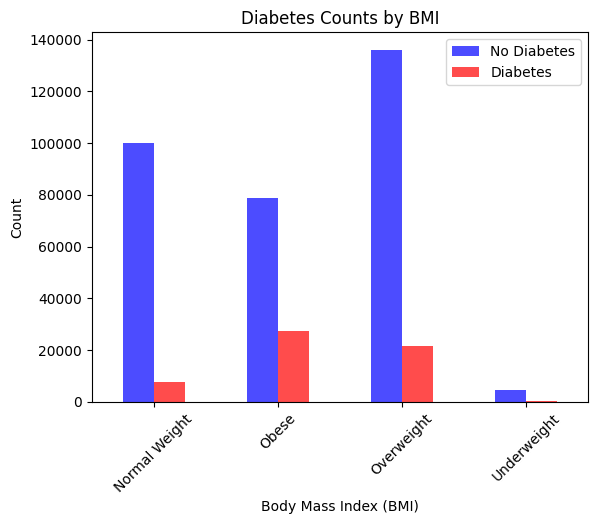

In [48]:
# Mapping categories to readable text
bmi_map = {
    1: 'Underweight',
    2: 'Normal Weight',
    3: 'Overweight',
    4: 'Obese'
}

# apply map to dataframe
df2 = df.copy()
df2['_BMI5CAT'] = df2['_BMI5CAT'].map(bmi_map)

# Cross-tabulate the data to get counts of diabetes and non-diabetes for each income group
cross_tab = pd.crosstab(df2['_BMI5CAT'], df2['DIABETE3'])

# Plot graph
cross_tab.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Count')
plt.title('Diabetes Counts by BMI')
plt.xticks(rotation=45)
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

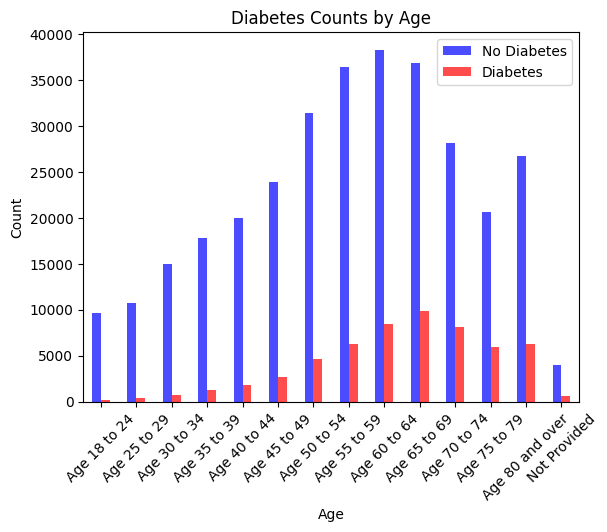

In [53]:
# Mapping categories to readable text
age_map = {
    1: 'Age 18 to 24',
    2: 'Age 25 to 29',
    3: 'Age 30 to 34',
    4: 'Age 35 to 39',
    5: 'Age 40 to 44',
    6: 'Age 45 to 49',
    7: 'Age 50 to 54',
    8: 'Age 55 to 59',
    9: 'Age 60 to 64',
    10: 'Age 65 to 69',
    11:'Age 70 to 74',
    12: 'Age 75 to 79',
    13: 'Age 80 and over',
    14: 'Not Provided'
}

# Apply map to datframe
df3 = df.copy()
df3['_AGEG5YR'] = df3['_AGEG5YR'].map(age_map)

# Cross-tabulate the data to get counts of diabetes and non-diabetes for each income group
cross_tab = pd.crosstab(df3['_AGEG5YR'], df3['DIABETE3'])

# Plot bar graph
cross_tab.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Diabetes Counts by Age')
plt.xticks(rotation=45)
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

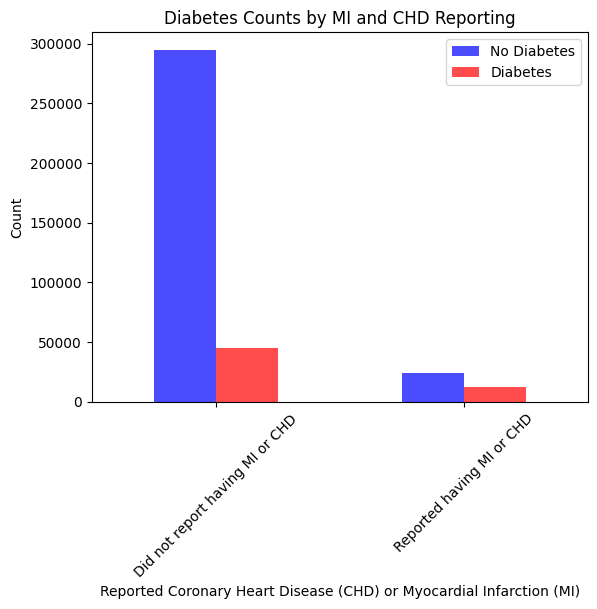

In [66]:
# Mapping categories to readable text
MICHD_map = {
    1: 'Reported having MI or CHD',
    2: 'Did not report having MI or CHD'
}

# Apply map to datframe
df4 = df.copy()
df4['_MICHD'] = df4['_MICHD'].map(MICHD_map)

# Cross-tabulate the data to get counts of diabetes and non-diabetes for each income group
cross_tab = pd.crosstab(df4['_MICHD'], df4['DIABETE3'])

# Plot bar graph
cross_tab.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.xlabel('Reported Coronary Heart Disease (CHD) or Myocardial Infarction (MI)')
plt.ylabel('Count')
plt.title('Diabetes Counts by MI and CHD Reporting')
plt.xticks(rotation=45)
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

## Feature Selection and Engineering

In [54]:
# select x and y
x = df[['_RFHLTH','_HCVU651','_RFHYPE5','_RFCHOL','_MICHD','_ASTHMS1','_DRDXAR1','_AGEG5YR','_BMI5CAT','_INCOMG','_SMOKER3','_DRNKWEK','_FRUTSUM','_VEGESUM','_PACAT1','_PAREC1']]

y = df['DIABETE3']

sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.43100424, -0.82192477,  0.88278287, ...,  0.13084304,
         0.32936956,  0.23746262],
       [-0.3762073 , -0.56376727, -0.74058233, ..., -0.80720173,
        -0.4892638 , -0.60660548],
       [ 1.43100424, -0.82192477,  0.88278287, ..., -1.19861609,
         0.32936956,  0.23746262],
       ...,
       [ 1.43100424,  1.24333521,  0.88278287, ..., -0.01762448,
         2.37595294,  2.34763288],
       [-0.3762073 , -0.82192477,  0.88278287, ..., -0.42253589,
         0.32936956,  0.23746262],
       [-0.3762073 , -0.82192477,  0.88278287, ..., -0.85444139,
        -0.07994712,  0.23746262]])

In [55]:
# Split dataset in 3 train, validation and
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Now split training + validation set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.80 = 0.20

# This results in 60% training, 20% validation, and 20% test

## Model Selection and Training

### Logistic Regression Model

In [56]:
model = LogisticRegression()
model.fit(x_train, y_train)

#Evaluate the model on the validation set
y_val_pred = model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.8479574892062438


### Decision Tree Model

In [57]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_val_pred = dt.predict(x_val)
val_accuracy = accuracy_score(y_val, dt_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.7771105944868815


### Random Forest Model

In [58]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Predict and evaluate
rf_pred = rf.predict(x_val)
print('Random Forest Accuracy:', accuracy_score(y_val, rf_pred))

Random Forest Accuracy: 0.8461640650946529


### Gradient Boosting Machines

In [59]:
gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train)

# Predict and evaluate
gbm_pred = gbm.predict(x_val)
print('GBM Accuracy:', accuracy_score(y_val, gbm_pred))

GBM Accuracy: 0.8532713384257722


## Model Evaluation and Tuning

### Logistic Regression Model

In [60]:
lr_pred = model.predict(x_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_preci = precision_score(y_test, lr_pred, average='weighted')
print("Accuracy:", lr_accuracy)
print("Precision:", lr_preci)

Accuracy: 0.8440916638990369
Precision: 0.788416883641091


### Decision Tree Model

In [62]:
dt_pred = dt.predict(x_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_preci = precision_score(y_test, dt_pred, average='weighted')
print("Accuracy:", dt_accuracy)
print("Precision:", dt_preci)

Accuracy: 0.7751843241448024
Precision: 0.78223240331247


### Random Forest Model

In [63]:
rf_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_preci = precision_score(y_test, rf_pred, average='weighted')
print("Accuracy:", rf_accuracy)
print("Precision:", rf_preci)

Accuracy: 0.8462437728329458
Precision: 0.8087789726250628


### Gradient Boosting Model

In [64]:
gbm_pred = gbm.predict(x_test)

gbm_accuracy = accuracy_score(y_test, gbm_pred)
gbm_preci = precision_score(y_test, gbm_pred, average='weighted')
print("Accuracy:", gbm_accuracy)
print("Precision:", gbm_preci)

Accuracy: 0.8529657920956493
Precision: 0.8198204545049518
